## Sara Abukhalaf (undergrad)

## INTRODUCTION

This report covers the individual work i did for Project Stage I which focuses on the analysis and understanding of the Presidential Election Dataset which is the data set i chose, related to covid 19 data for the state, New York. I divided this project part into three tasks:

In Task 1, I loaded and filtered the Presidential Election Dataset to include only New York counties. then inspected the dataset to understand its structure and key variables, like the number of votes tallied, total expected votes, and the percentage of votes counted in each county so i can get familiar with the dataset for upcoming tasks and project stages.

In Task 2, I made a list of the important columns in the election dataset (the data dictionary) and came up with a hypothesis. My hypothesis was that counties with different political preferences, shown by voter turnout or the candidate they supported, might have different trends in covid 19 cases. I also figured out how this election data could be combined with the covid 19 data for future analysis.


In Task 3, I analyzed covid 19 case trends for New York counties over the last week of available data. I then merged the Presidential Election Dataset with the covid 19 dataset overcoming challenges and explaining them and giving summary etc

## TASK ONE

In [24]:
import pandas as pd
import os

# getting the path to my pres folder
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
elections_folder = os.path.join(desktop_path, "project stage 1", "presidential elections")

# loading my president_county.csv file
president_county_path = os.path.join(elections_folder, 'president_county.csv')
president_county_data = pd.read_csv(president_county_path)

# filtering the data for the column state that = new york 
ny_election_data = president_county_data[president_county_data['state'] == 'New York']

# printing to inspect the data structure and data types
print(ny_election_data.dtypes)
print(ny_election_data.head())


state            object
county           object
current_votes     int64
total_votes       int64
percent           int64
dtype: object
         state              county  current_votes  total_votes  percent
2565  New York       Albany County         153586       154101      100
2566  New York     Allegany County          20716        20782      100
2567  New York        Bronx County         425883       425715      100
2568  New York       Broome County          92794        92794      100
2569  New York  Cattaraugus County          34760        34845      100


## TASK TWO

In [27]:
# making the data dictionary
data_dictionary = {
    "state": {
        "Data Type": "object (string)",
        "Description": "The U.S. state (New York in this dataset)."
    },
    "county": {
        "Data Type": "object (string)",
        "Description": "The county within the state of New York."
    },
    "current_votes": {
        "Data Type": "int64",
        "Description": "The number of votes tallied in the county so far."
    },
    "total_votes": {
        "Data Type": "int64",
        "Description": "The total number of votes expected in the county."
    },
    "percent": {
        "Data Type": "int64",
        "Description": "The percentage of votes counted for the county."
    }
}

# display the data dictionary 
for key, value in data_dictionary.items():
    print(f"Variable: {key}")
    print(f"  Data Type: {value['Data Type']}")
    print(f"  Description: {value['Description']}\n")


Variable: state
  Data Type: object (string)
  Description: The U.S. state (New York in this dataset).

Variable: county
  Data Type: object (string)
  Description: The county within the state of New York.

Variable: current_votes
  Data Type: int64
  Description: The number of votes tallied in the county so far.

Variable: total_votes
  Data Type: int64
  Description: The total number of votes expected in the county.

Variable: percent
  Data Type: int64
  Description: The percentage of votes counted for the county.



## INITIAL HYPOTHESIS

My initial Hypothesis: A county's political leaning, reflected by the presidential candidate or voter turnout, may influence covid 19 trends. Counties with higher voter turnout or specific political preferences can show different case patterns. In other words, counties that supported different political candidates or had different levels of voter turnout could show patterns in how covid 19 cases developed over time, like higher/lower infection rates or the differences in how cases increased/decreased.



Merging: I identified that the datasets can be merged on county (from the election data) and County Name (from the covid 19 data), which would let upcoming analysis of how election results cconect with the spread of covid 19.

## TASK THREE 

In [31]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# my path to the covid 19 data folder
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
covid_data_folder = os.path.join(desktop_path, "project stage 1", "covid 19 data")

# loading confirmed cases, deaths, and population data
confirmed_cases_path = os.path.join(covid_data_folder, 'covid_confirmed_usafacts.csv')
deaths_data_path = os.path.join(covid_data_folder, 'covid_deaths_usafacts.csv')
population_data_path = os.path.join(covid_data_folder, 'covid_county_population_usafacts.csv')

confirmed_data = pd.read_csv(confirmed_cases_path)
deaths_data = pd.read_csv(deaths_data_path)
population_data = pd.read_csv(population_data_path)

# filtering the data for the column state that = new york 
ny_confirmed_data = confirmed_data[confirmed_data['State'] == 'NY']
ny_deaths_data = deaths_data[deaths_data['State'] == 'NY']

# inspecting the filtered data for New York
print(ny_confirmed_data.head())
print(ny_deaths_data.head())


      countyFIPS            County Name State  StateFIPS  2020-01-22  \
1860           0  Statewide Unallocated    NY         36           0   
1861       36001         Albany County     NY         36           0   
1862       36003       Allegany County     NY         36           0   
1863       36005          Bronx County     NY         36           0   
1864       36007         Broome County     NY         36           0   

      2020-01-23  2020-01-24  2020-01-25  2020-01-26  2020-01-27  ...  \
1860           0           0           0           0           0  ...   
1861           0           0           0           0           0  ...   
1862           0           0           0           0           0  ...   
1863           0           0           0           0           0  ...   
1864           0           0           0           0           0  ...   

      2023-07-14  2023-07-15  2023-07-16  2023-07-17  2023-07-18  2023-07-19  \
1860           0           0           0        

In [32]:
# reshaping the confirmed cases data (melting the date columns)
ny_confirmed_data_melted = ny_confirmed_data.melt(
    id_vars=['countyFIPS', 'County Name', 'State'], 
    var_name='date', 
    value_name='cases'
)

# reshape the deaths data too
ny_deaths_data_melted = ny_deaths_data.melt(
    id_vars=['countyFIPS', 'County Name', 'State'], 
    var_name='date', 
    value_name='deaths'
)

# removing any non date columns (also ensuring that the date column is valid and there)
valid_dates = ny_confirmed_data_melted['date'].str.contains(r'\d{4}-\d{2}-\d{2}')
ny_confirmed_data_melted = ny_confirmed_data_melted[valid_dates]

valid_dates_deaths = ny_deaths_data_melted['date'].str.contains(r'\d{4}-\d{2}-\d{2}')
ny_deaths_data_melted = ny_deaths_data_melted[valid_dates_deaths]

# converting the date column to datetime format
ny_confirmed_data_melted['date'] = pd.to_datetime(ny_confirmed_data_melted['date'])
ny_deaths_data_melted['date'] = pd.to_datetime(ny_deaths_data_melted['date'])

# inspecting the reshaped data
print(ny_confirmed_data_melted.head())


    countyFIPS            County Name State       date  cases
63           0  Statewide Unallocated    NY 2020-01-22      0
64       36001         Albany County     NY 2020-01-22      0
65       36003       Allegany County     NY 2020-01-22      0
66       36005          Bronx County     NY 2020-01-22      0
67       36007         Broome County     NY 2020-01-22      0


date
2023-07-16    6703386
2023-07-17    6703386
2023-07-18    6703386
2023-07-19    6706390
2023-07-20    6706390
2023-07-21    6706390
2023-07-22    6706390
2023-07-23    6706390
Name: cases, dtype: int64


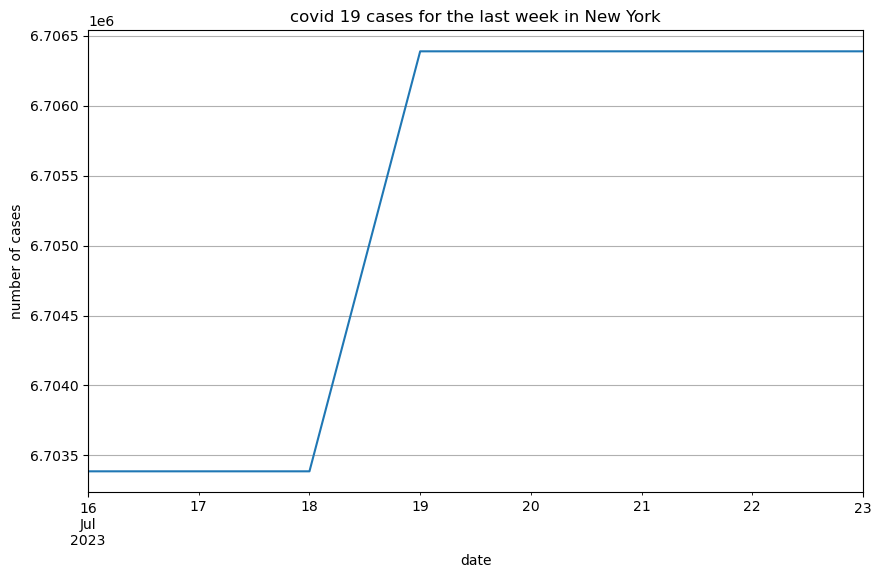

In [41]:
# filtering data for the last week 
last_week_data = ny_confirmed_data_melted[ny_confirmed_data_melted['date'] >= ny_confirmed_data_melted['date'].max() - pd.Timedelta(days=7)]

# analyzing the trend of cases in the last week by date
cases_trend = last_week_data.groupby('date')['cases'].sum()


print(cases_trend)

# plotting the trend of cases over the last week
cases_trend.plot(title='covid 19 cases for the last week in New York', figsize=(10, 6))
plt.ylabel('number of cases')
plt.xlabel('date')
plt.grid(True)
plt.show()



In [61]:
# renameing county to County Name in ny_election_data
ny_election_data = ny_election_data.rename(columns={'county': 'County Name'})

# spaces and making lowercase for consistency  and using .loc to avoid warnings
ny_confirmed_data_melted['County Name'] = ny_confirmed_data_melted['County Name'].str.strip().str.lower()

# using .loc to avoid the warning
ny_election_data.loc[:, 'County Name'] = ny_election_data['County Name'].str.strip().str.lower()

# merging datasets
merged_data = pd.merge(ny_confirmed_data_melted, ny_election_data, on='County Name', how='inner')

# printing
print(merged_data.head())


   countyFIPS         County Name State       date  cases     state  \
0       36001       albany county    NY 2020-01-22      0  New York   
1       36003     allegany county    NY 2020-01-22      0  New York   
2       36005        bronx county    NY 2020-01-22      0  New York   
3       36007       broome county    NY 2020-01-22      0  New York   
4       36009  cattaraugus county    NY 2020-01-22      0  New York   

   current_votes  total_votes  percent  
0         153586       154101      100  
1          20716        20782      100  
2         425883       425715      100  
3          92794        92794      100  
4          34760        34845      100  


In [63]:
import statsmodels.api as sm

# the dependent and independent variables
X = merged_data['percent']  # Voter turnout
y = merged_data['cases']  # COVID-19 cases

# adding a constant to the independent variable
X = sm.add_constant(X)

# regression
model = sm.OLS(y, X).fit()

# summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  cases   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 10 Sep 2024   Prob (F-statistic):                nan
Time:                        22:04:52   Log-Likelihood:            -1.0347e+06
No. Observations:               78430   AIC:                         2.069e+06
Df Residuals:                   78429   BIC:                         2.069e+06
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
percent      531.5922      4.633    114.728      0.0

# summary 

I loaded the covid 19 confirmed cases, deaths, and population data from multiple CSV files.
The data was filtered to include only New York state using the State column.

I reshaped both the covid 19 confirmed cases and deaths datasets using the melt() function to convert the data from wide format (with date columns) to long format. it was easier analysis of trends by date so we dont have any future problems.
After reshaping I cleaned the data to make sure only valid date columns were kept and converted the date columns to a datetime format. so its nice and clean and neat

visualizing the trend of covid 19 cases in New York for the last week of available data, I created a line plot. This plot displayed the number of confirmed cases on the y axis and the corresponding dates on the x axis. It showed a steady trend with a increase around July 19, 2023. This plot is titled covid 19 Cases trend for the last Week in New York, provided a visual of the trend that was observed in the data.

merged the covid 19 data with the Presidential Election Dataset on County Name.
The merged dataset included information on covid 19 cases, deaths, and election results ( current votes, total votes, and voter turnout).

regression analysis shows a statistically significant relationship between voter turnout and covid 19 cases with higher turnout associated with more cases because (coefficient = 531.59, p < 0.05). but the R-squared value is 0.000 which means voter turnout explains almost nonthing in covid 19 cases. :/


going back to my hypothesis even though voter turnout is statistically related to covid 19 cases it does not explain the differences in case trends between counties. that means that other factors like population characteristics or health may be more influential in covid 19 case trends. so theres a link but voter turn out by itself is not really a strong factor for why different counties have more/fewer covid 19 cases.


Challenges, debugging, errors, fixes etc:

When merging the election data with the covid 19 data, I encountered an issue where the County Name values didn’t match due to formatting like extra spaces and lower and uppercase inconsistencies 
and to fix this I took out spaces and standardized the case (lowercase) in the County Name columns in both datasets. This made sure that the merging would succeed without errors. also i encountered a SettingWithCopyWarning  which happens when pandas isn't sure if you're making changes to the actual data or just a copy of it i had to look up what this means because ive never seen it before. After looking it up, I found that this can cause issues so to fix this I used the .loc like in class which made sure the changes were applied safely avoiding any more warnings or errors.

